In [172]:
import seaborn as sns
import json
import os
import requests
import pandas as pd
import re
from bs4 import BeautifulSoup

In [173]:
os.chdir(r"C:\Users\josephwy\Documents")

# Bigfoot Sightings Data

I found a dataset that includes roughly 5000 bigfoot sightings from around the United States on https://data.world/timothyrenner/bfro-sightings-data. I downloaded it in a json format. 


## Upload Data

When I tried to upload the data, I was met with the following error: 

In [174]:
with open(r"bfro_reports.json", "r") as f:
    bf_data = json.load(f)

JSONDecodeError: Extra data: line 2 column 1 (char 972)

## Incomplete Json

I spent quite a bit of time trying to determine the nature of the problem. After some research and inspection of the file, I found that it was not in proper json format. The file was lacking brackets around the data, and commas between each braced region. 

## Repair Json file

I wrote the following code to repair the data. I first saved the json as a text file. 
The code iterates line by line through the dataset, adding commas to seperate braced regions.
It then saves the document as a json. 
I then manually added brackets to the beginning and end of the json.

In [206]:
with open(r"bfro_reports.txt", "r+") as f:
    mylist= list(f)
    newlist = []
    for line in mylist:
        line = line.strip() + ","
        print(line)
        newlist.append(line)
    f = str().join(newlist)
    with open(r"big_foot_data.json", "w") as bf:
        bf.write(f)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



{"REPORT_NUMBER": null, "REPORT_CLASS": null},
{"REPORT_NUMBER": null, "REPORT_CLASS": null},
{"REPORT_NUMBER": null, "REPORT_CLASS": null},
{"REPORT_NUMBER": "1563", "REPORT_CLASS": "Class A", "COUNTY": "Del Norte County", "DATE": "20", "MONTH": "October", "YEAR": "1967", "STATE": "California", "OBSERVED": "THE PATTERSON / GIMLIN FOOTAGE The Patterson/Gimlin footage is a short piece of 16mm film obtained by Roger Patterson and Robert Gimlin in 1967. It was obtained in the remote canyon of Bluff Creek, California, very close to the border of Del Norte County and Humboldt County. Both Patterson and Gimlin lived near Yakima, Washington. Patterson had been trying to obtain film footage of a bigfoot for many years. During the period he had also written a book entitled, \"Do Abominable Snowmen of America Really Exist?\" He hoped some decent film footage would help answer that question. In this book he calls attention to the unusually large amount of testimonial and circumstantial evidence p

## Upload Round Two

It worked this time! 

In [2]:
with open(r"big_foot_data.json", "r") as f:      
    bf_data = json.load(f)
    bf_df = pd.DataFrame(bf_data)    

FileNotFoundError: [Errno 2] No such file or directory: 'big_foot_data.json'

## Data Overview

In [1]:
 print(bf_df.head())

NameError: name 'bf_df' is not defined

## Information of Interest

After scanning through the data, I decided that the most valuable information would be the locations and dates of the sightings. I did't have the time or the interest to read all of the first hand accounts. 

In [208]:
print(bf_df.groupby('STATE').count())

                ALSO_NOTICED  A_&_G_References  COUNTY  DATE  ENVIRONMENT  \
STATE                                                                       
Alabama                   64                 0      91    59           88   
Alaska                    15                 0      20    13           18   
Arizona                   52                 0      84    61           82   
Arkansas                  63                 3      90    58           86   
California               257                23     398   243          361   
Colorado                  67                18     119    80          109   
Connecticut                7                 0      11     6            8   
Delaware                   4                 0       5     4            5   
Florida                  184                 0     283   199          271   
Georgia                   91                 4     121    93          115   
Idaho                     43                 0      70    48           66   

In [209]:
bf_df["STATE"].value_counts()
print(len(bf_df["STATE"].unique()))

50


## States Data in good shape

The states data all seemed pretty standardized and reasonable-- there were 49 states listed. This was pretty fortunate. 
Unfortunately, the Year data was a mess. 

In [210]:
bf_df["YEAR"].value_counts()


2000              182
2012              180
2004              173
2005              169
2006              168
2001              160
2003              143
2008              140
2011              130
2013              127
2002              126
2009              126
1998              123
2007              118
2010              110
2014              110
1997              103
1978               88
1977               83
1996               83
1999               81
1980               80
2015               72
1993               67
1995               66
1994               63
1979               59
1975               58
1982               56
1986               56
                 ... 
85-present          1
1999/2000           1
1986-87             1
1996,1999           1
1996 or 1997        1
2011-2013           1
1970?               1
1989/90             1
1956 or 1957        1
1954-55             1
72-73               1
97-98               1
1983/2010           1
1997 -98            1
1984/1985 

## Cleaning the YEAR Data

There were 2 problems with the year data:
1. It was far from standardized and incredibly messy.
2. It was in string format and therefore difficult to treat chronologically

I decided to use regular expressions to replace all of the unusual dates I found. 
At the onset it seemed most efficient to just address each variation (such as "85-present") individually. I used the replace command and wrote verbatim regular expressions to match them. This proved to be a miserable experience and took far longer than I anticipated. I should have written a more general code. In any case, my regex replacement is shown below: 

In [211]:
#cleanup YEAR 
#In cases where multiple dates are listed, I replace with the earliest.
#In the case of an ambiguous range, I replaced with the average
bf_df["YEAR"].replace(regex={r"^2000-2003" : "2002", "^1977 or 78": "1977",
     "^1977 or 78$": "1977", "^97-98$": "1977", "^mid 80's$": "1985", 
     "^\'01or \'02$": "2002", "^1980-1999$": "1990", "^04-05$": "2004",
     "^1997/1998$": "1997", "^95-96$": "1995", "^1991/1999$": "1991", 
     "^1947/48$": "1947", "In the 1980's$": "1985", "^1988-1989$" : "1988",
     "^92 or 93$": "1992", "1986- 2008$" : "1997", "^1980-82$" : "1981",
     "^1971 or 72$" : "1971", "2012`$" : "2012", "^Late1960's$" : "1968", 
     "^1956 or 1957$" : "1956", "^1987-88$" : "1987", "^1991-92$" : "1991",
     "^1974-1976$" : "1975", "^1984?$" : "1984", "^near 1983$" : "1983", 
     "^about 1960$" : "1960", "1976-1978$" : "1977", "^1981, 1982$" : "1981",
     "^Late 70s$" : "1978", "79, 80, 99$" : "1980", r"93/95$" : "1993", 
     "^1985 - '87$" : "1986", "72 or 73$" : "1972", "^1971-72$" : "1971",
     "^1998 or 19$" : "1998", "^1989?$" : "1989", "^Early 1980s$" : "^1980",
     "^1994-1997+" : "1994", "^198945/86$" : "1989", "^1994+" : "1994", 
     "^198941, 1982$" : "1982", "^1978-1990$" : "1978", "^2014-2016" : "2014",
     r"^198943/2010" : "1989", "^2005 2009" : "2005", "^198949 &2005" : "1989",
     "^1973 or 74" : "1973", "^1992-3" : "1992", "^1970-1972" : "1970", 
     "^Early 1990's" : "1992", "^198949" : "1989", "^198947" : "1989", 
     "^1978 thru 1982" : "1978", "^1973-'76" : "1973", "^19894[\d]" : "1989", 
     "^app. 1985" : "1985", "^2004-2005" : "2004", "^1959 or 60" : "1959", 
     "^1978-79" : "1978", "^2010/2011" : "2010", "^2008/2009" : "2008", 
     r"^1/5/1998" : "1998", "^1990 appro" : "1990", "^2005-06" : "2005", 
     "^2009-2010" : "2009", "^93-98" : "1993", "^71' or 72'" : "1971", 
     "^1930's" : "1930", "^1994\?" : "1994", "^1976 or 77" : "1976", "mid 1970's" : "1970", 
     "^Late 1980s" : "1988", "^1994[\d]+" : "1994", "^1961 1962" : "1961",
     "^1952 or 1953" : "1952", "^1976-2000-2008" : "1976", "^1989-86" : "1989",
     "^1979 or 80" : "1979", "^2000/2001" : "2000", "^93" : "1993",
     "^2000-2001" : "2000", "^1989,19943" : "1989", "^2001-2004" : "2001",
     "^07" : "2007", "^2002-2003" : "2002", "^119930" : "1993",
     "^119191919932" : "1993", "^202020202007" : "2007", "^119191919930" : "1993",
     "^1919191993" : "1993", "^2020202007" : "2007", "^1989 or '86" : "1989",
     "^11919930" : "1993", "^191993" : "1993", "^1970's-1980's" : "1970", 
     "^1994-2001" : "1994", "^1989 or 1987?" : "1987", 
     "^11919932" : "1993", "^191993" : "1993", "^1978 to 1980" : "1978", 
     "^est mid-70" : "1975", 
     "^About 1977" : "1977", "^" : "", "^" : "", "^" : "", 
     "^" : "", "^" : "", "^" : "", "^" : "", 
     "^" : "", "^" : "", "^" : "", "^" : "", 
     "^" : "", "^" : "", "^" : "", "^" : "",  }, inplace=True)


## Progress Check

I tried to see how many of the 400+ unique "YEAR" listings had been whittled down by my 
superhuman efforts. You can imagine my frustration to see the following:

In [212]:
print(bf_df["YEAR"].unique())
print(len(bf_df["YEAR"].unique()))

['1992' '1972' '19894' '1973' '1971' '2003' '1970' nan '2000' '2016'
 '1979' '1962' '1989' '2006' '2007' '1956' '2010' '2013' '2011' '1977'
 '2009' '1978' '1990' '1993' '1975' '1976' '2012' '1969' '2014' '2001'
 '2015' '1998' '1994' '1997' '2008' '1966' '1960' '1985' '1991' '2004'
 '2005' '1988' '1999' '1961' '1967' '1954' '2002' '1974' '1932' '1968'
 '1959' '1950' '1965' '1995' '1996' '1957' '1930' '1952' None "1992, '93"
 '1989,1993' '1997-2001' '1987?' '1995, 1998' '1962?' '1958' '1989?'
 '1989 until a few years ago.' '1994-95' '09-12' '1998-00' '1989-87'
 '2002.1980?' '2004?' '2017' '1989 or 81' '2002-2004' '1995 to 2003'
 '1963' '1943' '1999-2000?' '2010-2014' '1989/82' '1989 or 83' '1996-1997'
 '1997 -98' '1976-1980' '1942' "1989's" "'73-'74?" '1973-1974?'
 'About 1970' '1979-80' 'Around 1992' '71, 83, 94' '19894/85?' '1963-2002'
 '1949' '73-75' '94 or 95' '1989-1' '1994-96' 'mid 90s' '1976-77' '1989s'
 '83  or 84' '1992 or 1993' '1978-80' '1989-1987' '1978-1979' 'about 1980'
 '1

In [213]:
type(bf_df)

pandas.core.frame.DataFrame

## Desperate times call for desperate measures

I was beyond jaded to find that I had only eliminated 100 of the faulty years.
In a fit of rage, I wrote the following code: 

In [214]:
bf_df = bf_df.dropna(subset=["YEAR"])

In [215]:
good_years = "^[\d]{4}$"
bf_df = bf_df[bf_df["YEAR"].str.match(good_years)]

In [216]:
print(bf_df["YEAR"].unique())
print(len(bf_df["YEAR"].unique()))

['1992' '1972' '1973' '1971' '2003' '1970' '2000' '2016' '1979' '1962'
 '1989' '2006' '2007' '1956' '2010' '2013' '2011' '1977' '2009' '1978'
 '1990' '1993' '1975' '1976' '2012' '1969' '2014' '2001' '2015' '1998'
 '1994' '1997' '2008' '1966' '1960' '1985' '1991' '2004' '2005' '1988'
 '1999' '1961' '1967' '1954' '2002' '1974' '1932' '1968' '1959' '1950'
 '1965' '1995' '1996' '1957' '1930' '1952' '1958' '2017' '1963' '1943'
 '1942' '1949' '1921' '1964' '1941' '1910' '1944' '1955' '1905' '1982'
 '1938' '1948' '1890' '1945' '1953' '1937' '1925' '1920' '1870' '1926'
 '1940' '1947']
82


In [217]:
bf_df["YEAR"].value_counts()

1989    496
2000    185
2012    181
2004    176
2005    171
2006    168
2001    161
2003    143
2008    141
2011    130
2002    129
2009    128
2013    127
1998    125
2007    120
2010    111
2014    111
1997    105
1978     95
1977     87
1996     83
1999     81
2015     72
1993     69
1995     67
1994     65
1979     61
1975     60
1991     56
1976     51
       ... 
1960      4
1955      3
1957      3
1949      3
1943      2
1944      2
1930      2
1988      2
1920      2
1959      2
1905      1
1948      1
1942      1
1925      1
1985      1
1932      1
1926      1
1954      1
1890      1
1952      1
1870      1
1910      1
1947      1
1921      1
1941      1
1940      1
1937      1
1938      1
1982      1
1945      1
Name: YEAR, Length: 82, dtype: int64

In [218]:
print(len(bf_df.index))

4264


## YEAR Cleaning Continued

At the expense of roughly 800 entries (which is admittedly nontrivial, but also not as bad as wasting 4 more hours on bigfoot data cleaning,) I managed to clear out all those nasty YEAR entries. To be clear, were I responsible for doing something more with the data, I would have saved all 800 of those little guys.

Then I converted the years into integers

In [219]:
bf_df[['YEAR']] = bf_df[['YEAR']].apply(pd.to_numeric)

To verify that they were in fact integers, I took maxes and mins:


In [220]:
print(bf_df["YEAR"].max())
print(bf_df["YEAR"].min())


2017
1870


## Data Visualization

Then I wanted to visualize bigfoot sightings by state per year. The first scatterplot was illegible:

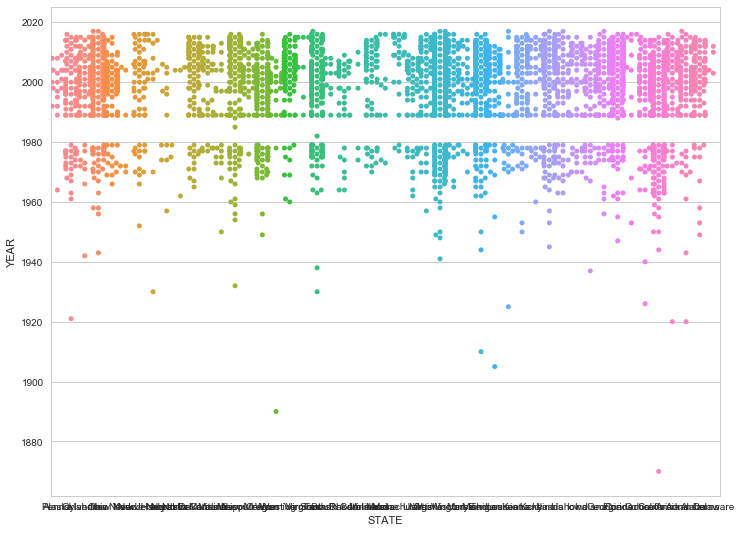

In [221]:
sns.set(style="whitegrid")

ax = sns.swarmplot(x="STATE", y="YEAR", data=bf_df)

So I decided to group the states by US Census Regions: Northeast, Midwest, South, and West. I did so by creating my own dataframe to merge with the bigfoot one. 

In [222]:
with open(r"state_region.csv", "r") as j:
    state_df = pd.read_csv(j)

In [223]:
state_df.head()

,STATE,REGION
0,Connecticut,New England
1,Maine,New England
2,Massachusetts,New England
3,New Hampshire,New England
4,Rhode Island,New England


In [224]:
bf_df = bf_df.merge(state_df, left_on='STATE', right_on='STATE', how='outer')

With the merge complete, I then played around with some new graphs:

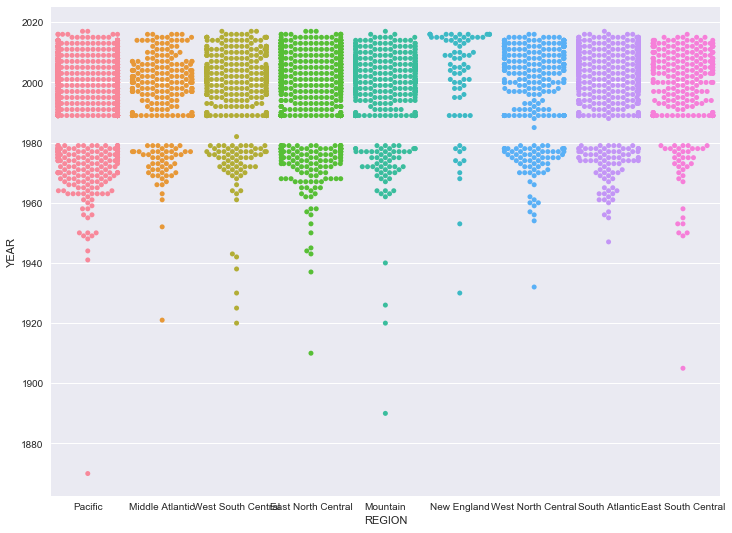

In [225]:
sns.set(rc={'figure.figsize':(12,9)})
ax = sns.swarmplot(x="REGION", y="YEAR", data=bf_df)

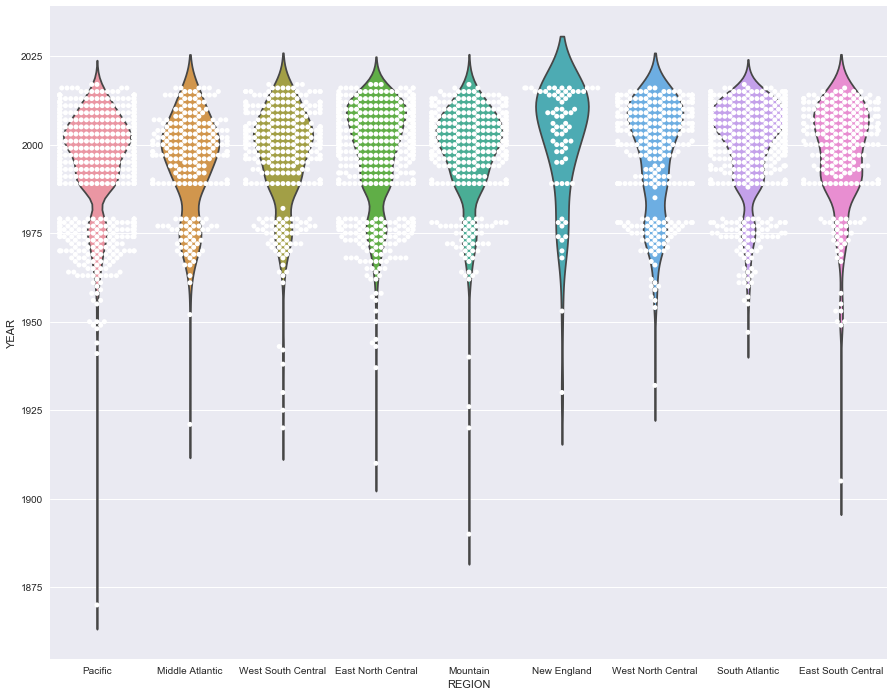

In [226]:
sns.set(rc={'figure.figsize':(15,12)})
ax = sns.violinplot(x="REGION", y="YEAR", data=bf_df, inner=None)
ax = sns.swarmplot(x="REGION", y="YEAR", data=bf_df,color="white", edgecolor="gray")

In [227]:
print(bf_df["REGION"].value_counts())

Pacific               1107
East North Central     766
South Atlantic         670
Mountain               424
West South Central     392
West North Central     308
East South Central     283
Middle Atlantic        246
New England             70
Name: REGION, dtype: int64


In [228]:
print(bf_df["YEAR"].value_counts())

1989.0    496
2000.0    185
2012.0    181
2004.0    176
2005.0    171
2006.0    168
2001.0    161
2003.0    143
2008.0    141
2011.0    130
2002.0    129
2009.0    128
2013.0    127
1998.0    125
2007.0    120
2010.0    111
2014.0    111
1997.0    105
1978.0     95
1977.0     87
1996.0     83
1999.0     81
2015.0     72
1993.0     69
1995.0     67
1994.0     65
1979.0     61
1975.0     60
1991.0     56
1976.0     51
         ... 
1953.0      4
1957.0      3
1949.0      3
1955.0      3
1943.0      2
1944.0      2
1930.0      2
1988.0      2
1920.0      2
1959.0      2
1985.0      1
1941.0      1
1952.0      1
1945.0      1
1890.0      1
1925.0      1
1932.0      1
1937.0      1
1921.0      1
1942.0      1
1948.0      1
1905.0      1
1926.0      1
1940.0      1
1947.0      1
1954.0      1
1982.0      1
1910.0      1
1938.0      1
1870.0      1
Name: YEAR, Length: 82, dtype: int64


## Conclusions:

The Pacific is a hotspot for bigfoot sightings. I'm certain that he spent some time in the region, likely within the last 18 years. 

# Alchohol Consumption by State

I found the following data in a Washington Post article:
https://www.washingtonpost.com/news/wonk/wp/2016/12/24/where-the-heaviest-drinking-americans-live/?noredirect=on&utm_term=.4070d0f562d6

It gives the average monthly drinking rate per state for the years 2008-2009 and 2014-2015

## Reading in the Data

I scraped in the data from the Washington post website and parsed it using BeautifulSoup

In [229]:
site_text = requests.get("https://www.washingtonpost.com/news/wonk/wp/2016/12/24/where-the-heaviest-drinking-americans-live/?noredirect=on&utm_term=.4070d0f562d6").text
soup = BeautifulSoup(site_text, 'html.parser')


Here is the prettified file:

In [230]:
print(soup.prettify())

<!DOCTYPE html>
<html class="blog layout_article pb_actual_layout_article rendering-context-www outputtype_default-article" lang="en">
 <head>
  <script>
   window.pbDeferredScripts=window.pbDeferredScripts||new Array;
  </script>
  <script id="_$cookiemonster">
   (function(document,undefined){var wl={};wl.reg=[];wl.map=[];function CM(wlmap,wlreg){this.wl={map:wl.map.concat(wlmap||[]),reg:wl.reg.concat(wlreg||[])}}CM.prototype.ommNom=function(){return this.nom(true,undefined)};CM.prototype.allows=function(cookieKey){var yum=this.nom(false,[cookieKey]).indexOf(cookieKey)>-1;return!yum};CM.prototype.nom=function(deleteCookies,cookiesList){var unset=[];var domainkey=document.location.hostname.split("").reverse().join("").slice(0,18),dcookies=cookiesList||document.cookie.split(";"),
dcookie,save,reg;for(var i=0;i<dcookies.length,dcookie=dcookies[i];i++){save=dcookie.trim().split("\x3d")[0].toLowerCase();if(this.wl.map.indexOf(save)>-1);else unset.push(save)}for(var o=0;o<this.wl.reg.lengt

## Tabulating the Data

I tabulated the data using the pandas read_html function. It came out very nicely:

In [231]:
alchohol_table = soup.find_all('table')[0]     
alch_df = pd.read_html(str(alchohol_table))[0]

In [232]:
print(alch_df)

             State  Monthly drinking rate, 2008-2009  \
0          Alabama                             42.94   
1           Alaska                             54.52   
2          Arizona                             51.15   
3         Arkansas                             43.29   
4       California                             50.65   
5         Colorado                             62.22   
6      Connecticut                             59.32   
7         Delaware                             56.32   
8          Florida                             51.41   
9          Georgia                             48.89   
10          Hawaii                             48.23   
11           Idaho                             45.71   
12        Illinois                             54.33   
13         Indiana                             48.06   
14            Iowa                             56.70   
15          Kansas                             53.92   
16        Kentucky                             3

The data is very clean and simple and doesn't require any further preparation. For this reason, I played with it in some other ways. 

First, I renamed the column labels, since they are so lengthy

In [233]:
alch_df = alch_df.rename(index=str, columns={"Monthly drinking rate, 2008-2009": "Drinking_Rate_08-09", "Monthly drinking rate, 2014-2015": "Drinking_Rate_14-15"})

In [234]:
list(alch_df)

['State', 'Drinking_Rate_08-09', 'Drinking_Rate_14-15']

Next, I created a new variable that is the average of the drinking rates over the two periods (2008-2009 and 2014-2015). 
This way I have a more general drinking rate per state. 

In order to do so, I had to change the column type to int

In [235]:
alch_df[['Drinking_Rate_08-09']] = alch_df[['Drinking_Rate_08-09']].apply(pd.to_numeric)

In [236]:
alch_df['Avg_Drinking_Rate'] = (alch_df["Drinking_Rate_08-09"] + alch_df["Drinking_Rate_14-15"])/2

In [237]:
alch_df

,State,Drinking_Rate_08-09,Drinking_Rate_14-15,Avg_Drinking_Rate
0,Alabama,42.94,43.94,43.440
1,Alaska,54.52,54.98,54.750
2,Arizona,51.15,51.19,51.170
3,Arkansas,43.29,41.81,42.550
4,California,50.65,51.54,51.095
5,Colorado,62.22,59.22,60.720
6,Connecticut,59.32,60.33,59.825
7,Delaware,56.32,53.85,55.085
8,Florida,51.41,54.83,53.120
9,Georgia,48.89,48.90,48.895


In [238]:
alch_df = alch_df.merge(state_df, left_on='State', right_on='STATE', how='outer')

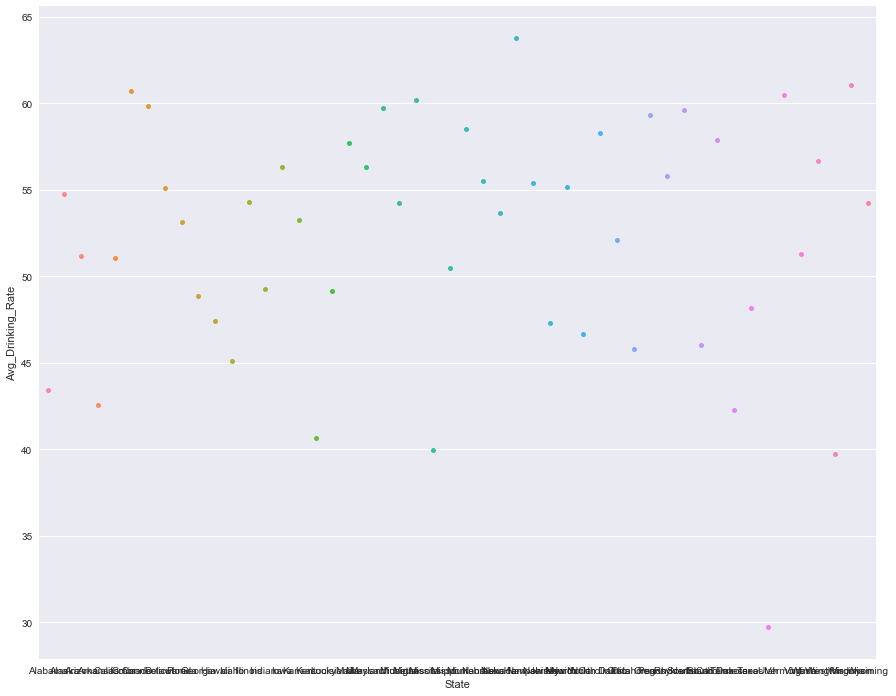

In [239]:
bx = sns.swarmplot(x="State", y="Avg_Drinking_Rate", data=alch_df)

Again, the plot is pretty illegible due to the large number of states. Good thing I still had my State_region csv

In [240]:
alch_df = alch_df.merge(state_df, left_on='State', right_on='STATE', how='outer')

In [241]:
alch_df

,State,Drinking_Rate_08-09,Drinking_Rate_14-15,Avg_Drinking_Rate,STATE_x,REGION_x,STATE_y,REGION_y
0,Alabama,42.94,43.94,43.440,Alabama,East South Central,Alabama,East South Central
1,Alaska,54.52,54.98,54.750,Alaska,Pacific,Alaska,Pacific
2,Arizona,51.15,51.19,51.170,Arizona,Mountain,Arizona,Mountain
3,Arkansas,43.29,41.81,42.550,Arkansas,West South Central,Arkansas,West South Central
4,California,50.65,51.54,51.095,California,Pacific,California,Pacific
5,Colorado,62.22,59.22,60.720,Colorado,Mountain,Colorado,Mountain
6,Connecticut,59.32,60.33,59.825,Connecticut,New England,Connecticut,New England
7,Delaware,56.32,53.85,55.085,Delaware,South Atlantic,Delaware,South Atlantic
8,Florida,51.41,54.83,53.120,Florida,South Atlantic,Florida,South Atlantic
9,Georgia,48.89,48.90,48.895,Georgia,South Atlantic,Georgia,South Atlantic


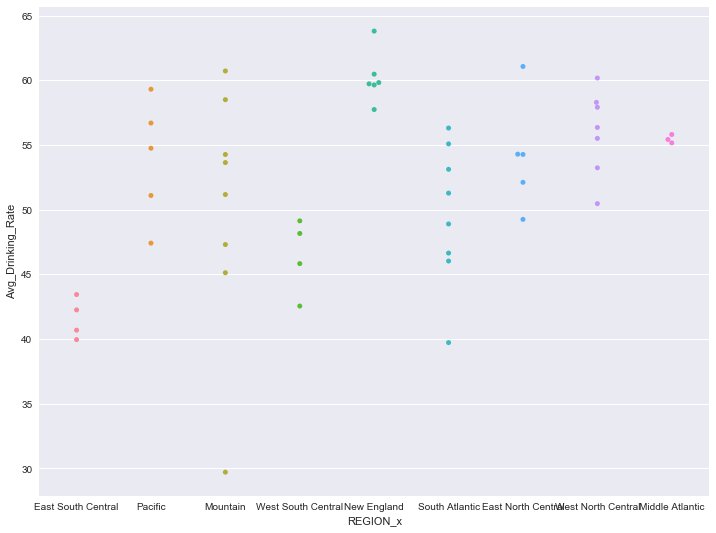

In [203]:
bx = sns.swarmplot(x="REGION_x", y="Avg_Drinking_Rate", data=alch_df)

In [242]:
bf_df = bf_df.merge(alch_df, left_on='STATE', right_on='STATE_x', how='outer')

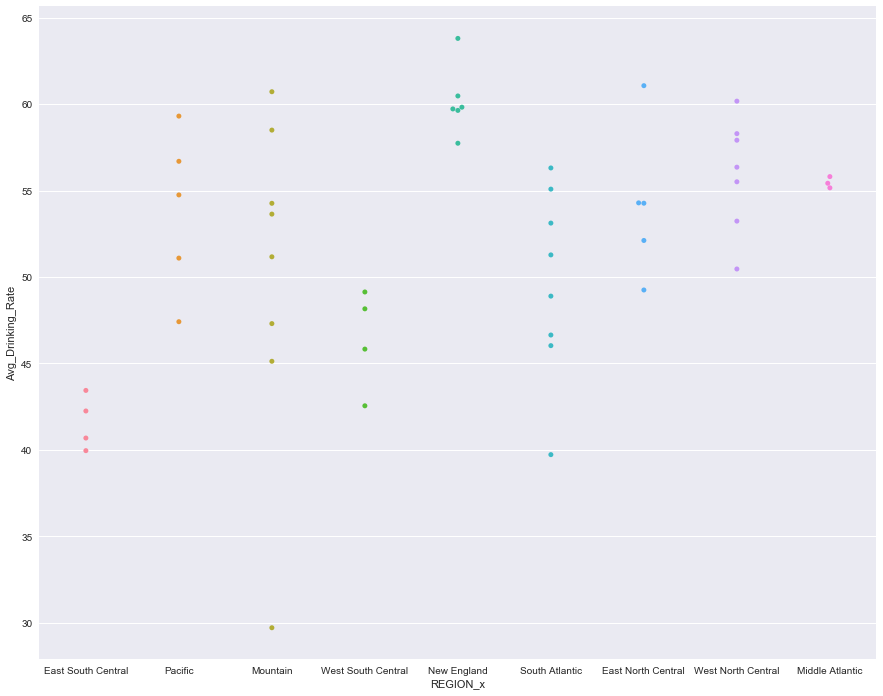

In [243]:
cx = sns.swarmplot(x="REGION_x", y="Avg_Drinking_Rate", data=alch_df)

In [248]:
bf_df['freq'] = bf_df.groupby('STATE')['STATE'].transform('count')

In [249]:
bf_df['freq'].describe()

count    4266.000000
mean      193.860759
std       146.703521
min         1.000000
25%        79.000000
50%       180.000000
75%       254.000000
max       500.000000
Name: freq, dtype: float64

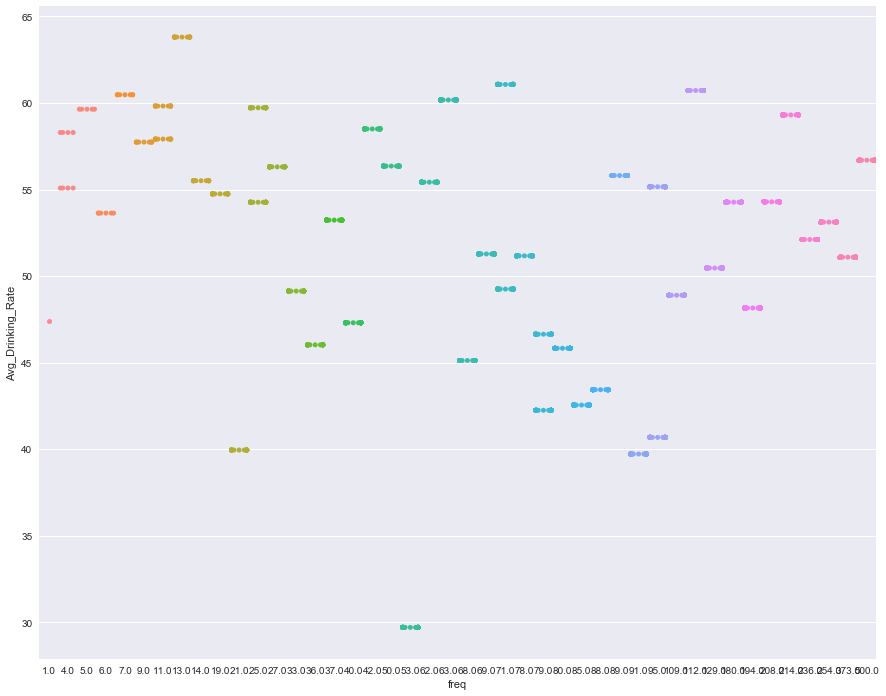

In [251]:
dx = sns.swarmplot(x="freq", y="Avg_Drinking_Rate", data=bf_df)